Data Understanding and checking data quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#Read csv file without ID column
ico_df = pd.read_csv("..\Data\data.csv",usecols=lambda x: x not in ["ID","brandSlogan"])

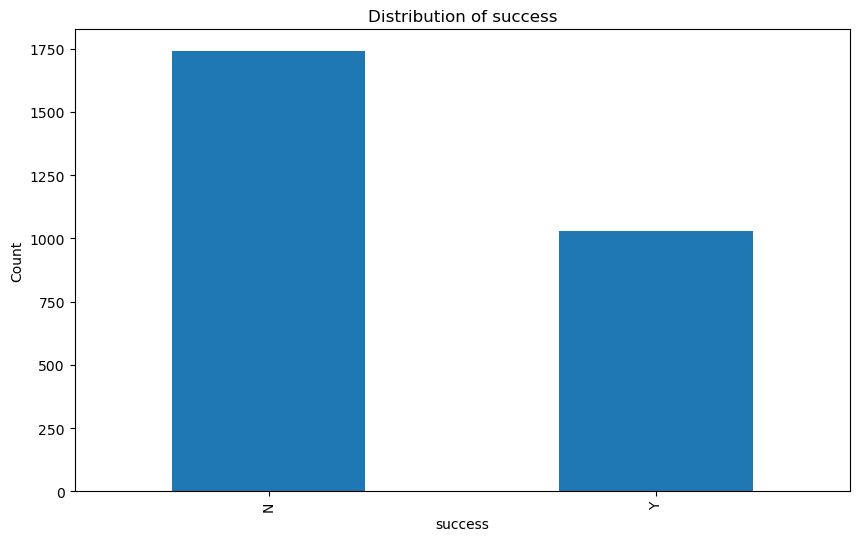

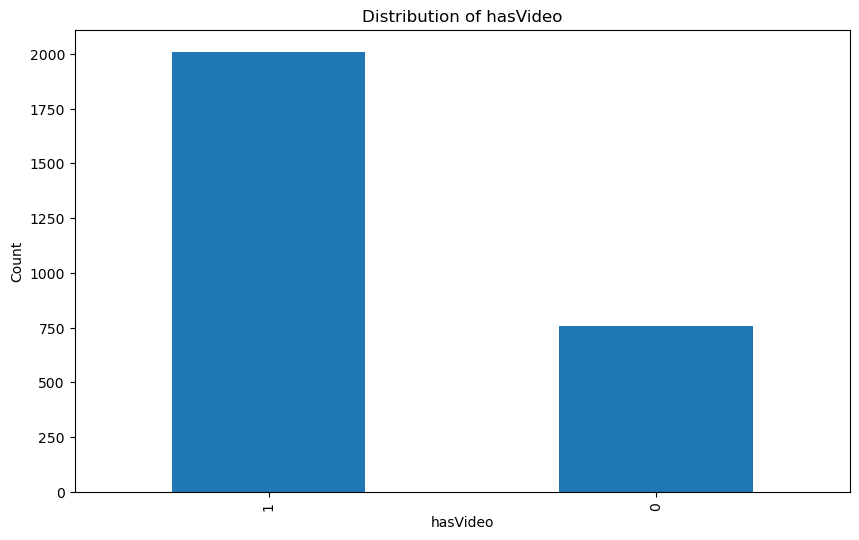

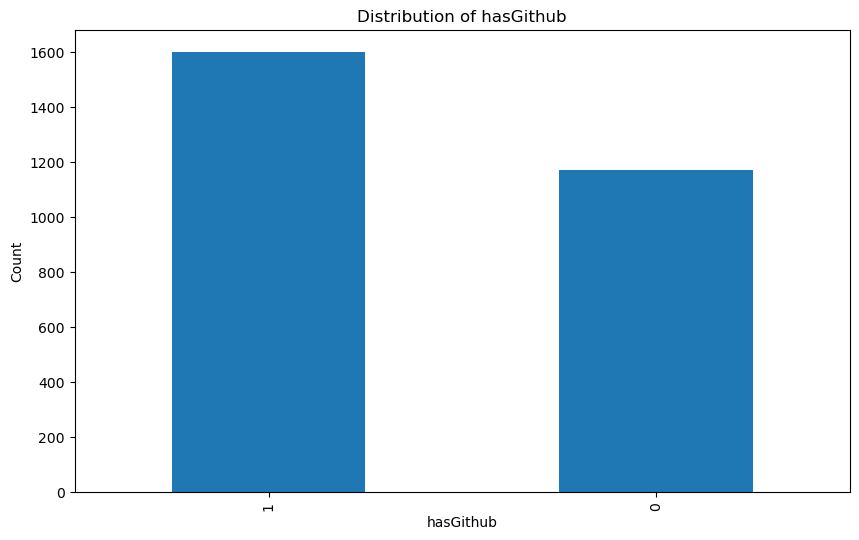

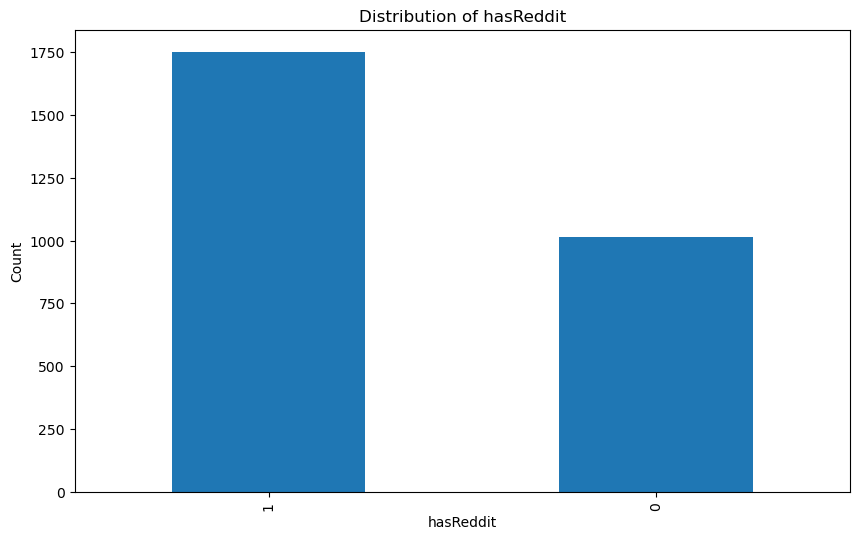

In [29]:
# Categorical variables of interest
categorical_vars = ['success','hasVideo', 'hasGithub', 'hasReddit']

# Plotting bar charts for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    ico_df[var].value_counts().plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=90)
    plt.show()

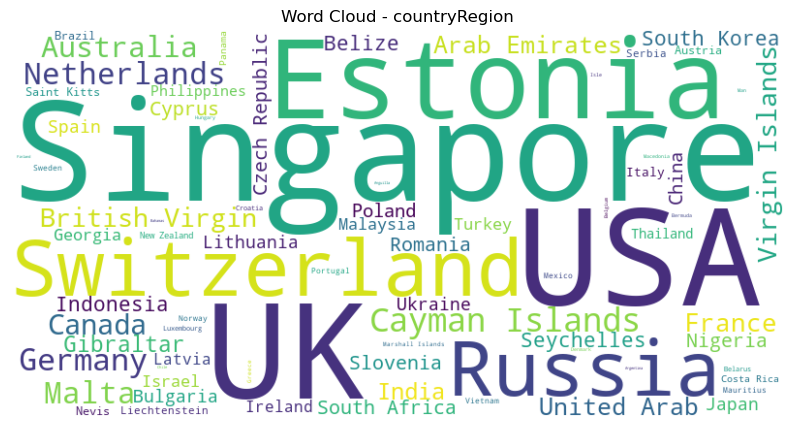

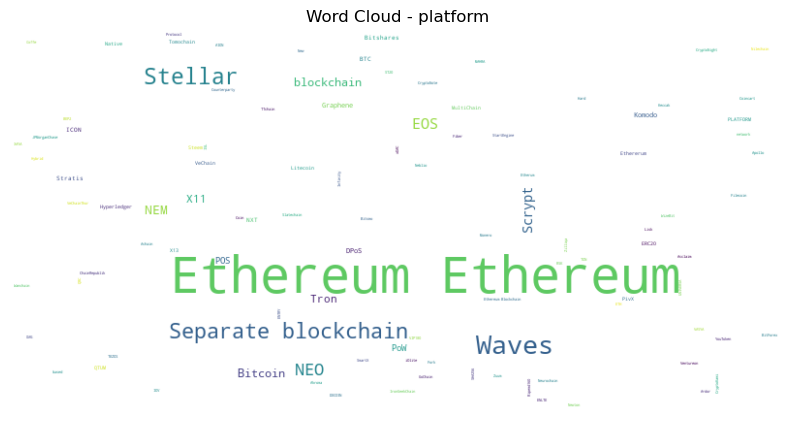

In [4]:
from wordcloud import WordCloud
# Selecting the 'countryRegion' and 'platform' columns
country_region_data = ico_df['countryRegion'].dropna().astype(str)
platform_data = ico_df['platform'].dropna().astype(str)
# Creating a WordCloud for 'countryRegion'
plt.figure(figsize=(10, 6))
wordcloud_country_region = WordCloud(width=800, height=400, background_color='white').generate(' '.join(country_region_data))
plt.imshow(wordcloud_country_region, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - countryRegion')
plt.show()

# Creating a WordCloud for 'platform'
plt.figure(figsize=(10, 6))
wordcloud_platform = WordCloud(width=800, height=400, background_color='white').generate(' '.join(platform_data))
plt.imshow(wordcloud_platform, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - platform')
plt.show()

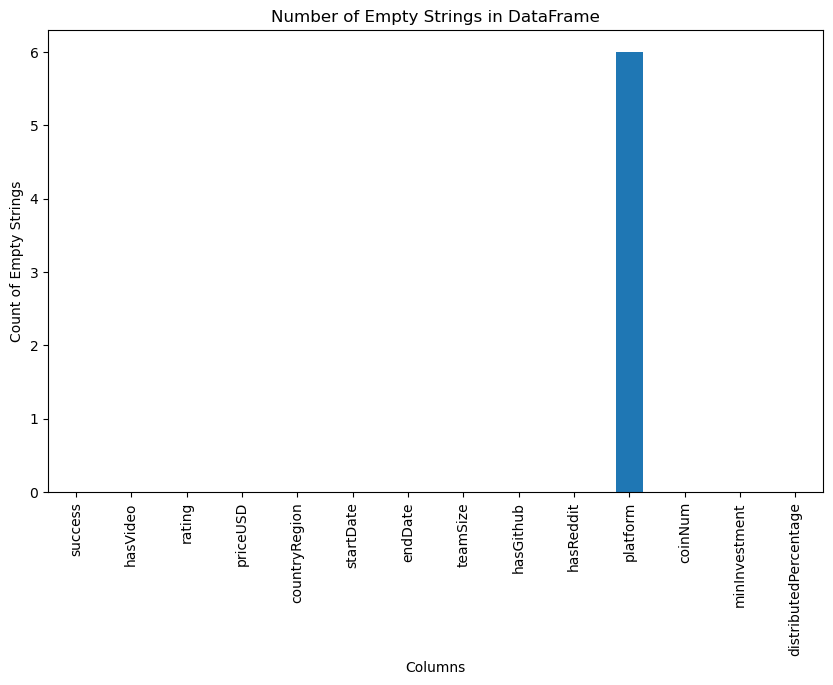

In [5]:
# Counting the number of empty strings in each column
empty_string_counts = ico_df.eq(' ').sum()

# Creating a bar plot to visualize the counts
plt.figure(figsize=(10, 6))
empty_string_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Empty Strings')
plt.title('Number of Empty Strings in DataFrame')
plt.xticks(rotation=90)
plt.show()

In [6]:
#Getting an overview of data
ico_df.head()

,success,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,N,1,4.0,30.00,Singapore,01/10/2019,01/10/2019,31.0,1,1,Ethereum,509999,0,0.49
1,N,1,4.3,0.13,Malta,07/09/2018,12/10/2018,20.0,1,1,XAYA,225000000,1,0.41
2,N,1,4.4,0.01,UK,01/07/2019,30/06/2020,10.0,1,1,Stellar,5000000000,1,0.40
3,Y,1,4.3,NaN,Netherlands,01/10/2019,15/12/2019,27.0,1,1,Separate blockchain,125000000,1,0.13
4,N,1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5000000000,1,0.50


In [7]:
#Checking data types of each columns
ico_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   success                2767 non-null   object 
 1   hasVideo               2767 non-null   int64  
 2   rating                 2767 non-null   float64
 3   priceUSD               2587 non-null   float64
 4   countryRegion          2696 non-null   object 
 5   startDate              2767 non-null   object 
 6   endDate                2767 non-null   object 
 7   teamSize               2613 non-null   float64
 8   hasGithub              2767 non-null   int64  
 9   hasReddit              2767 non-null   int64  
 10  platform               2767 non-null   object 
 11  coinNum                2767 non-null   int64  
 12  minInvestment          2767 non-null   int64  
 13  distributedPercentage  2767 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 302.8+ 

From the column description given in description file, we know that columns hasVideo, hasGithub, hasReddit, mininvestment, rating and success are category column.

In [8]:
#converting some columns to pandas category variable and displaying them
ico_df = ico_df.astype({'hasVideo':'category', 'hasGithub':'category','hasReddit':'category','minInvestment':'category','rating':'category','success':'category'})
ico_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   success                2767 non-null   category
 1   hasVideo               2767 non-null   category
 2   rating                 2767 non-null   category
 3   priceUSD               2587 non-null   float64 
 4   countryRegion          2696 non-null   object  
 5   startDate              2767 non-null   object  
 6   endDate                2767 non-null   object  
 7   teamSize               2613 non-null   float64 
 8   hasGithub              2767 non-null   category
 9   hasReddit              2767 non-null   category
 10  platform               2767 non-null   object  
 11  coinNum                2767 non-null   int64   
 12  minInvestment          2767 non-null   category
 13  distributedPercentage  2767 non-null   float64 
dtypes: category(6), float64(3), int64(1), ob

In [9]:
#Converting to date/time variable
ico_df['startDate'] = pd.to_datetime(ico_df['startDate'],format='%d/%m/%Y')
ico_df['endDate'] = pd.to_datetime(ico_df['endDate'],format='%d/%m/%Y')
ico_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   success                2767 non-null   category      
 1   hasVideo               2767 non-null   category      
 2   rating                 2767 non-null   category      
 3   priceUSD               2587 non-null   float64       
 4   countryRegion          2696 non-null   object        
 5   startDate              2767 non-null   datetime64[ns]
 6   endDate                2767 non-null   datetime64[ns]
 7   teamSize               2613 non-null   float64       
 8   hasGithub              2767 non-null   category      
 9   hasReddit              2767 non-null   category      
 10  platform               2767 non-null   object        
 11  coinNum                2767 non-null   int64         
 12  minInvestment          2767 non-null   category      
 13  dis

In [10]:
#Replace null strings with NA values in entire dataset
ico_df = ico_df.replace(r'^\s*$', np.nan, regex=True)

<Axes: >

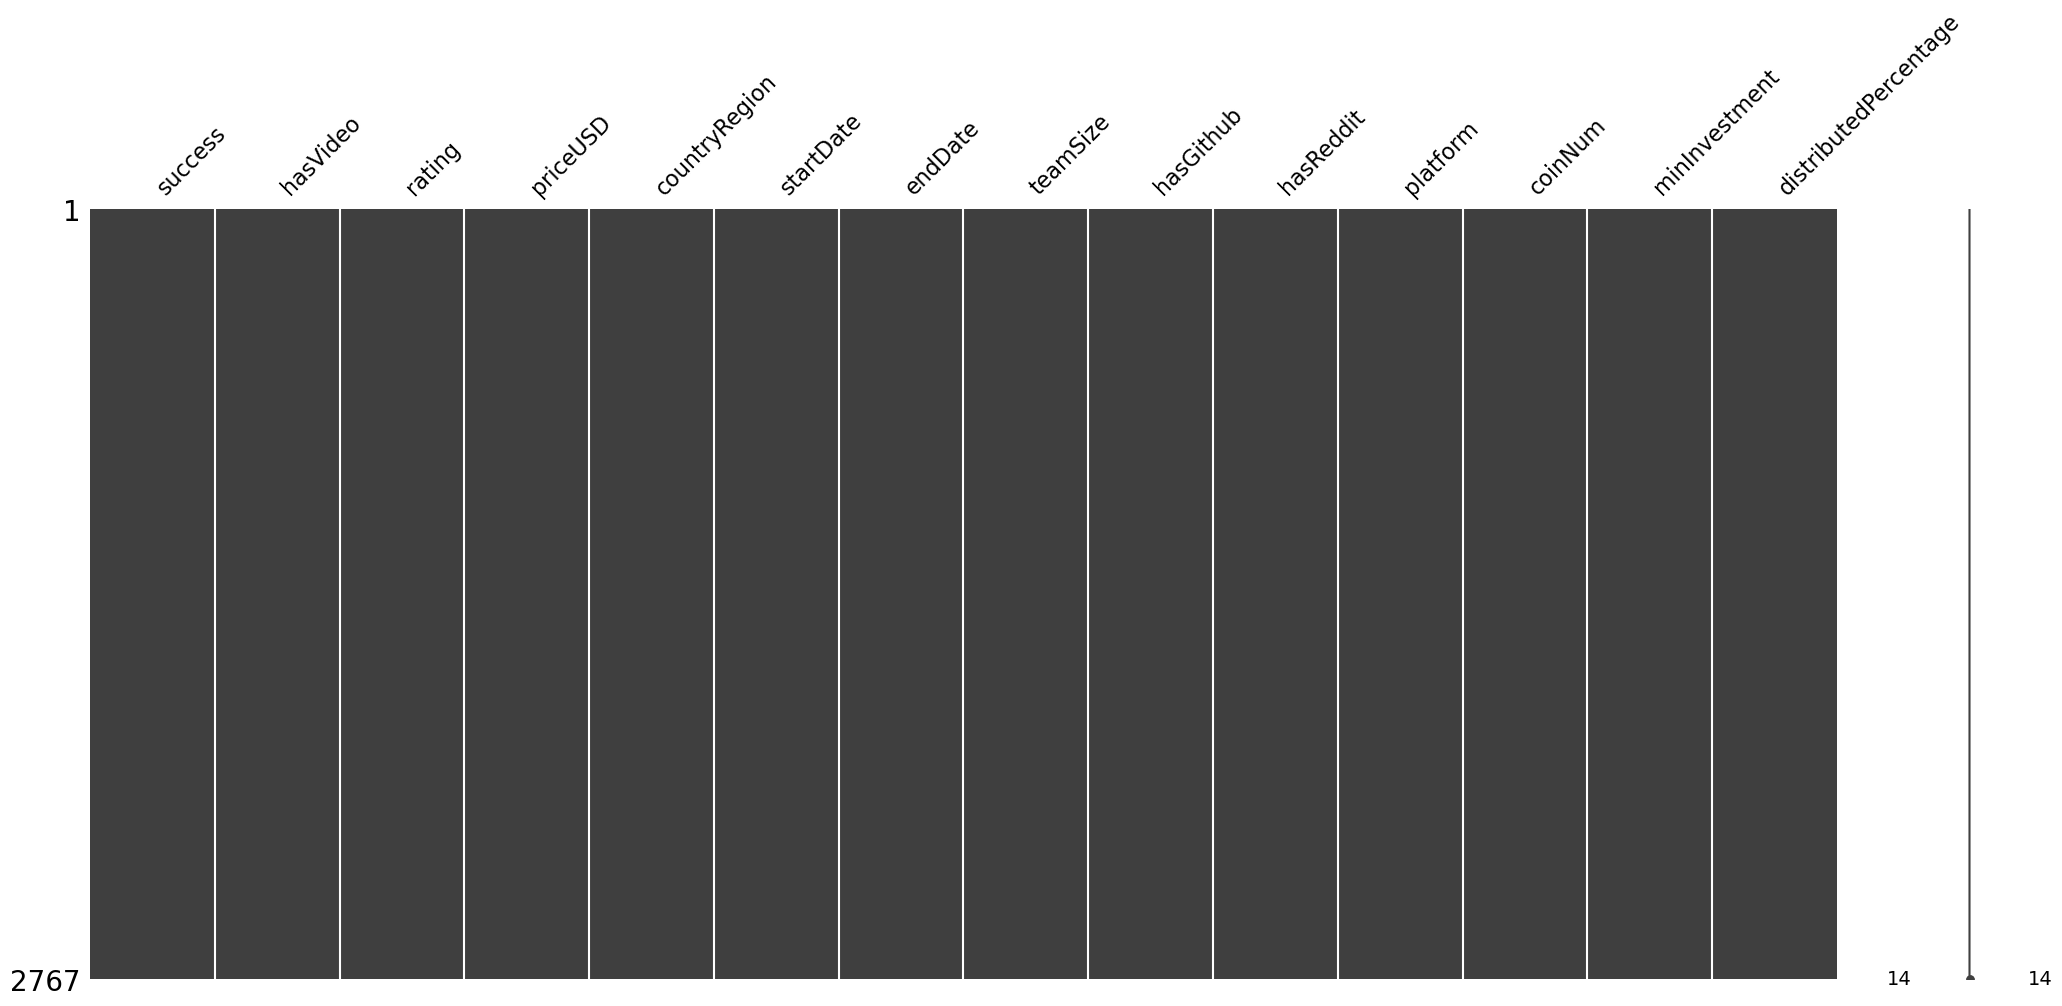

In [11]:
#Check rows which has more than 1 column with N/A values
#ico_df[ico_df.isna().sum(axis=1) > 1]

#Clean more rows after analysis.
ico_df_clean = ico_df.copy()
#priceUSD N/A values replaced with mean
ico_df_clean['priceUSD'].fillna(ico_df_clean['priceUSD'].mean(), inplace=True)
#countryRegion N/A values replaced with Unknown country
ico_df_clean['countryRegion'].fillna(value='Unknown', inplace=True)
#teamSize N/A values replaced with median
ico_df_clean['teamSize'].fillna(ico_df_clean['teamSize'].median(), inplace=True)
#platform N/A values replaced with Unknown platform
ico_df_clean['platform'].fillna(value='Unknown', inplace=True)

#Check the empty values now
msno.matrix(ico_df_clean)

In [12]:
#Create new column to calculate duration
ico_df_clean['campaign_duration'] = (ico_df_clean['endDate'] - ico_df_clean['startDate']).dt.days

In [13]:
# Identify rows with negative campaign duration
negative_duration_mask = ico_df_clean['campaign_duration'] < 0

# Swap start date and end date for rows with negative campaign duration - Not working, converting datetime column to object type
#ico_df.loc[negative_duration_mask, ['startDate', 'endDate']] = ico_df.loc[negative_duration_mask, ['endDate', 'startDate']].values

# Swap start date and end date using a temporary column
ico_df_clean.loc[negative_duration_mask, 'tempDate'] = ico_df_clean.loc[negative_duration_mask, 'startDate']
ico_df_clean.loc[negative_duration_mask, 'startDate'] = ico_df_clean.loc[negative_duration_mask, 'endDate']
ico_df_clean.loc[negative_duration_mask, 'endDate'] = ico_df_clean.loc[negative_duration_mask, 'tempDate']

# Remove the temporary column
ico_df_clean.drop('tempDate', axis=1, inplace=True)

# Update campaign duration for the swapped rows
ico_df_clean['campaign_duration'] = (ico_df_clean['endDate'] - ico_df_clean['startDate']).dt.days

# Convert 'startDate' and 'endDate' columns back to datetime format
ico_df_clean['startDate'] = pd.to_datetime(ico_df_clean['startDate'])
ico_df_clean['endDate'] = pd.to_datetime(ico_df_clean['endDate'])

#check now for -ve campaign duration
ico_df_clean[ico_df_clean['campaign_duration'] < 0]


,success,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,campaign_duration


In [14]:
#check unique values now
ico_df_clean.platform.unique()

array(['Ethereum', 'XAYA', 'Stellar', 'Separate blockchain',
       'IOV Blockchain', 'Separate Blockchain  ', 'VeChainThor VIP180',
       'DECOIN Blockchain', 'EOS', 'Native', 'VeChain',
       'Stellar Protocol', 'Stratis', 'X11', 'Ethereum   ', 'NEO', 'NEM',
       'X11 blockchain', 'Ethereum ', 'CryptoNight', 'PivX', 'TEZOS',
       'ERC20', 'Waves', 'BitForex', 'Tomochain', 'ENTRY', 'Graphene',
       'Acclaim', 'Zilliqa', 'Hyperledger', 'GoChain', 'DPOS',
       'Slatechain', 'BitShares', 'Ethereum, Waves', 'RSK',
       'IronGeekChain', 'ENLTE PLATFORM', 'Scrypt', 'Apollo Blockchain',
       'Coincart', 'Achain', 'Tron', 'Neurochain', 'Separate Blockchain',
       'Blockchain', 'Ethereum  ', 'Ardor', 'Ethereum     ', 'WizeBit',
       'Lisk', 'ICON', 'Wanchain', 'ETH', 'Hard-Fork of Litecoin',
       'Fiber', 'QRC', 'TRON', 'Ventureon', 'StartEngine', 'Ethereum    ',
       'Bitcoin', 'Steem', 'Coffe', 'Nem', ' NEO', 'Komodo',
       'SHA256 Coin', 'Monero', 'MultiChain', 'QTUM

In [15]:
import re

# Convert the column to string type
ico_df_clean['platform'] = ico_df_clean['platform'].astype(str)
#Remove white spaces after the string value in platform column
ico_df_clean['platform'] = ico_df_clean['platform'].str.strip()

# Remove non-printable or special characters using regular expression
ico_df_clean['platform'] = ico_df_clean['platform'].apply(lambda x: re.sub(r'[^\x20-\x7E]', '', x))

#check unique values now
ico_df_clean.platform.unique()

array(['Ethereum', 'XAYA', 'Stellar', 'Separate blockchain',
       'IOV Blockchain', 'Separate Blockchain', 'VeChainThor VIP180',
       'DECOIN Blockchain', 'EOS', 'Native', 'VeChain',
       'Stellar Protocol', 'Stratis', 'X11', 'NEO', 'NEM',
       'X11 blockchain', 'CryptoNight', 'PivX', 'TEZOS', 'ERC20', 'Waves',
       'BitForex', 'Tomochain', 'ENTRY', 'Graphene', 'Acclaim', 'Zilliqa',
       'Hyperledger', 'GoChain', 'DPOS', 'Slatechain', 'BitShares',
       'Ethereum, Waves', 'RSK', 'IronGeekChain', 'ENLTE PLATFORM',
       'Scrypt', 'Apollo Blockchain', 'Coincart', 'Achain', 'Tron',
       'Neurochain', 'Blockchain', 'Ardor', 'WizeBit', 'Lisk', 'ICON',
       'Wanchain', 'ETH', 'Hard-Fork of Litecoin', 'Fiber', 'QRC', 'TRON',
       'Ventureon', 'StartEngine', 'Bitcoin', 'Steem', 'Coffe', 'Nem',
       'Komodo', 'SHA256 Coin', 'Monero', 'MultiChain', 'QTUM',
       'JPMorganChase', 'SmartX', 'Newton', 'Ripemd160', 'New Blockchain',
       'DPoS', 'BTC', 'Multichain', 'Hybrid'

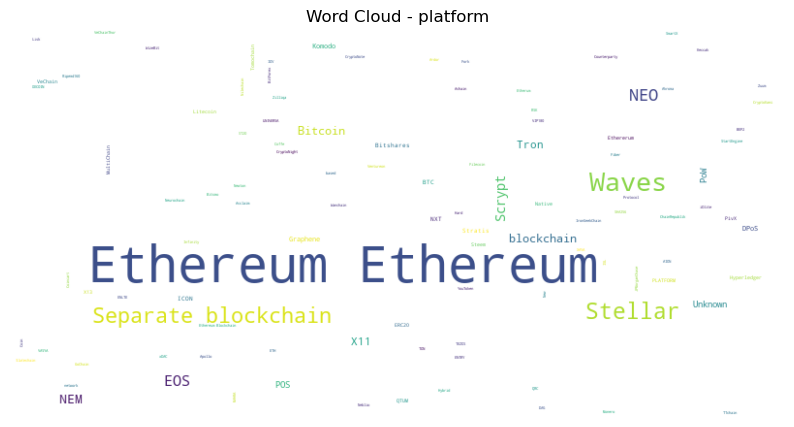

In [16]:
# Selecting the 'countryRegion' and 'platform' columns
#country_region_data = ico_df['countryRegion'].dropna().astype(str)
platform_data_clean = ico_df_clean['platform'].dropna().astype(str)
# Creating a WordCloud for 'countryRegion'
# plt.figure(figsize=(10, 6))
# wordcloud_country_region = WordCloud(width=800, height=400, background_color='white').generate(' '.join(country_region_data))
# plt.imshow(wordcloud_country_region, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud - countryRegion')
# plt.show()

# Creating a WordCloud for 'platform'
plt.figure(figsize=(10, 6))
wordcloud_platform = WordCloud(width=800, height=400, background_color='white').generate(' '.join(platform_data_clean))
plt.imshow(wordcloud_platform, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - platform')
plt.show()

In [17]:


#ico_df.platform.unique() #check unique values before mapping

#group similar looking values
crypto_mapping = {
    'BTC':'Bitcoin',
    'Bitcoin/Bitcoin':'Bitcoin',
    'ETH': 'Ethereum',
    'Etherum': 'Ethereum',
    'Ethererum': 'Ethereum',
    'Ethereum, Waves': 'WavesAndEthereum'
}

# Create a regular expression pattern from the dictionary keys
pattern = re.compile('|'.join(map(re.escape, crypto_mapping.keys())))

# Replace the values in the DataFrame column
ico_df_clean['platform'] = ico_df_clean['platform'].str.replace(pattern, lambda m: crypto_mapping[m.group(0)])

#check unique values now
ico_df_clean.platform.unique()

array(['Ethereum', 'XAYA', 'Stellar', 'Separate blockchain',
       'IOV Blockchain', 'Separate Blockchain', 'VeChainThor VIP180',
       'DECOIN Blockchain', 'EOS', 'Native', 'VeChain',
       'Stellar Protocol', 'Stratis', 'X11', 'NEO', 'NEM',
       'X11 blockchain', 'CryptoNight', 'PivX', 'TEZOS', 'ERC20', 'Waves',
       'BitForex', 'Tomochain', 'ENTRY', 'Graphene', 'Acclaim', 'Zilliqa',
       'Hyperledger', 'GoChain', 'DPOS', 'Slatechain', 'BitShares',
       'WavesAndEthereum', 'RSK', 'IronGeekChain', 'ENLTE PLATFORM',
       'Scrypt', 'Apollo Blockchain', 'Coincart', 'Achain', 'Tron',
       'Neurochain', 'Blockchain', 'Ardor', 'WizeBit', 'Lisk', 'ICON',
       'Wanchain', 'Hard-Fork of Litecoin', 'Fiber', 'QRC', 'TRON',
       'Ventureon', 'StartEngine', 'Bitcoin', 'Steem', 'Coffe', 'Nem',
       'Komodo', 'SHA256 Coin', 'Monero', 'MultiChain', 'QTUM',
       'JPMorganChase', 'SmartX', 'Newton', 'Ripemd160', 'New Blockchain',
       'DPoS', 'Multichain', 'Hybrid', 'X13', 'NXT

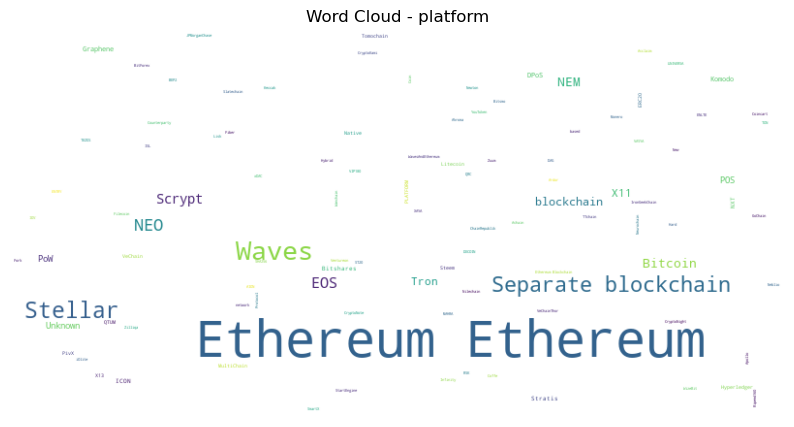

In [18]:
# Selecting the 'countryRegion' and 'platform' columns
#country_region_data = ico_df['countryRegion'].dropna().astype(str)
platform_data_clean = ico_df_clean['platform'].dropna().astype(str)
# Creating a WordCloud for 'countryRegion'
# plt.figure(figsize=(10, 6))
# wordcloud_country_region = WordCloud(width=800, height=400, background_color='white').generate(' '.join(country_region_data))
# plt.imshow(wordcloud_country_region, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud - countryRegion')
# plt.show()

# Creating a WordCloud for 'platform'
plt.figure(figsize=(10, 6))
wordcloud_platform = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ico_df_clean['platform']))
plt.imshow(wordcloud_platform, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - platform')
plt.show()

In [19]:
ico_df_clean[ico_df_clean['platform'] == 'Ethereum']

,success,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,campaign_duration
0,N,1,4.0,30.00,Singapore,2019-10-01,2019-10-01,31.0,1,1,Ethereum,509999,0,0.49,0
4,N,1,4.3,0.03,Mauritius,2019-07-28,2019-11-30,14.0,1,1,Ethereum,5000000000,1,0.50,125
5,N,1,4.7,0.10,UK,2020-02-25,2020-06-30,43.0,1,1,Ethereum,500000000,1,0.50,126
6,Y,1,4.1,0.02,Singapore,2018-06-08,2018-08-05,20.0,1,1,Ethereum,2500000000,1,0.25,58
9,Y,1,4.2,0.10,Samoa,2018-09-01,2018-09-30,29.0,1,1,Ethereum,600000000,1,0.15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,Y,0,1.8,0.03,Singapore,2018-05-09,2018-06-30,12.0,0,0,Ethereum,1000000000,1,0.35,52
2762,N,0,1.0,1.00,USA,2017-12-02,2017-12-31,12.0,0,0,Ethereum,800000000,0,0.80,29
2763,N,0,1.0,0.30,Indonesia,2017-09-15,2017-10-31,12.0,0,0,Ethereum,100000000,0,0.20,46
2764,Y,1,2.0,0.67,Germany,2017-10-18,2017-11-01,12.0,1,1,Ethereum,50000000,0,0.50,14


In [20]:
ico_df[ico_df['distributedPercentage'] > 100]

,success,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
964,N,1,3.5,2.88,Thailand,2018-06-01,2018-06-30,7.0,1,1,X11,6656250,0,266.25
1029,N,1,3.3,0.50,Switzerland,2019-11-15,2020-05-15,7.0,1,1,Ethereum,17395000,0,869.75


In [21]:
#distributedPercentage cannot be more than 100, thus remove rows with distributedPercentage > 100
ico_df_clean = ico_df_clean[ico_df_clean['distributedPercentage'] <= 100] #Removed 2 rows

<function matplotlib.pyplot.show(close=None, block=None)>

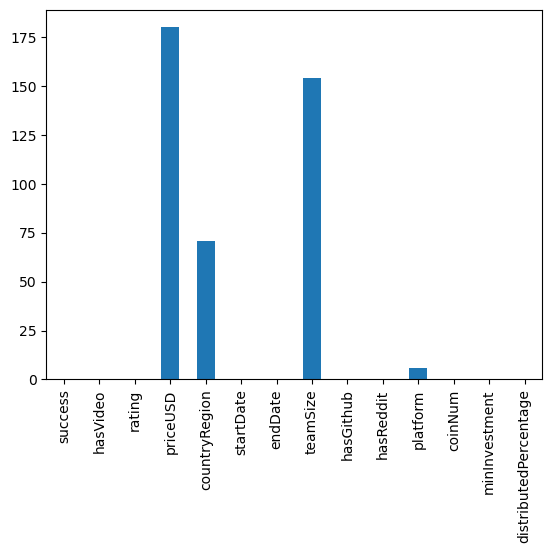

In [22]:
#Plot the number of N/A values in each column
ico_df.isna().sum().plot(kind='bar')
plt.show

<Axes: >

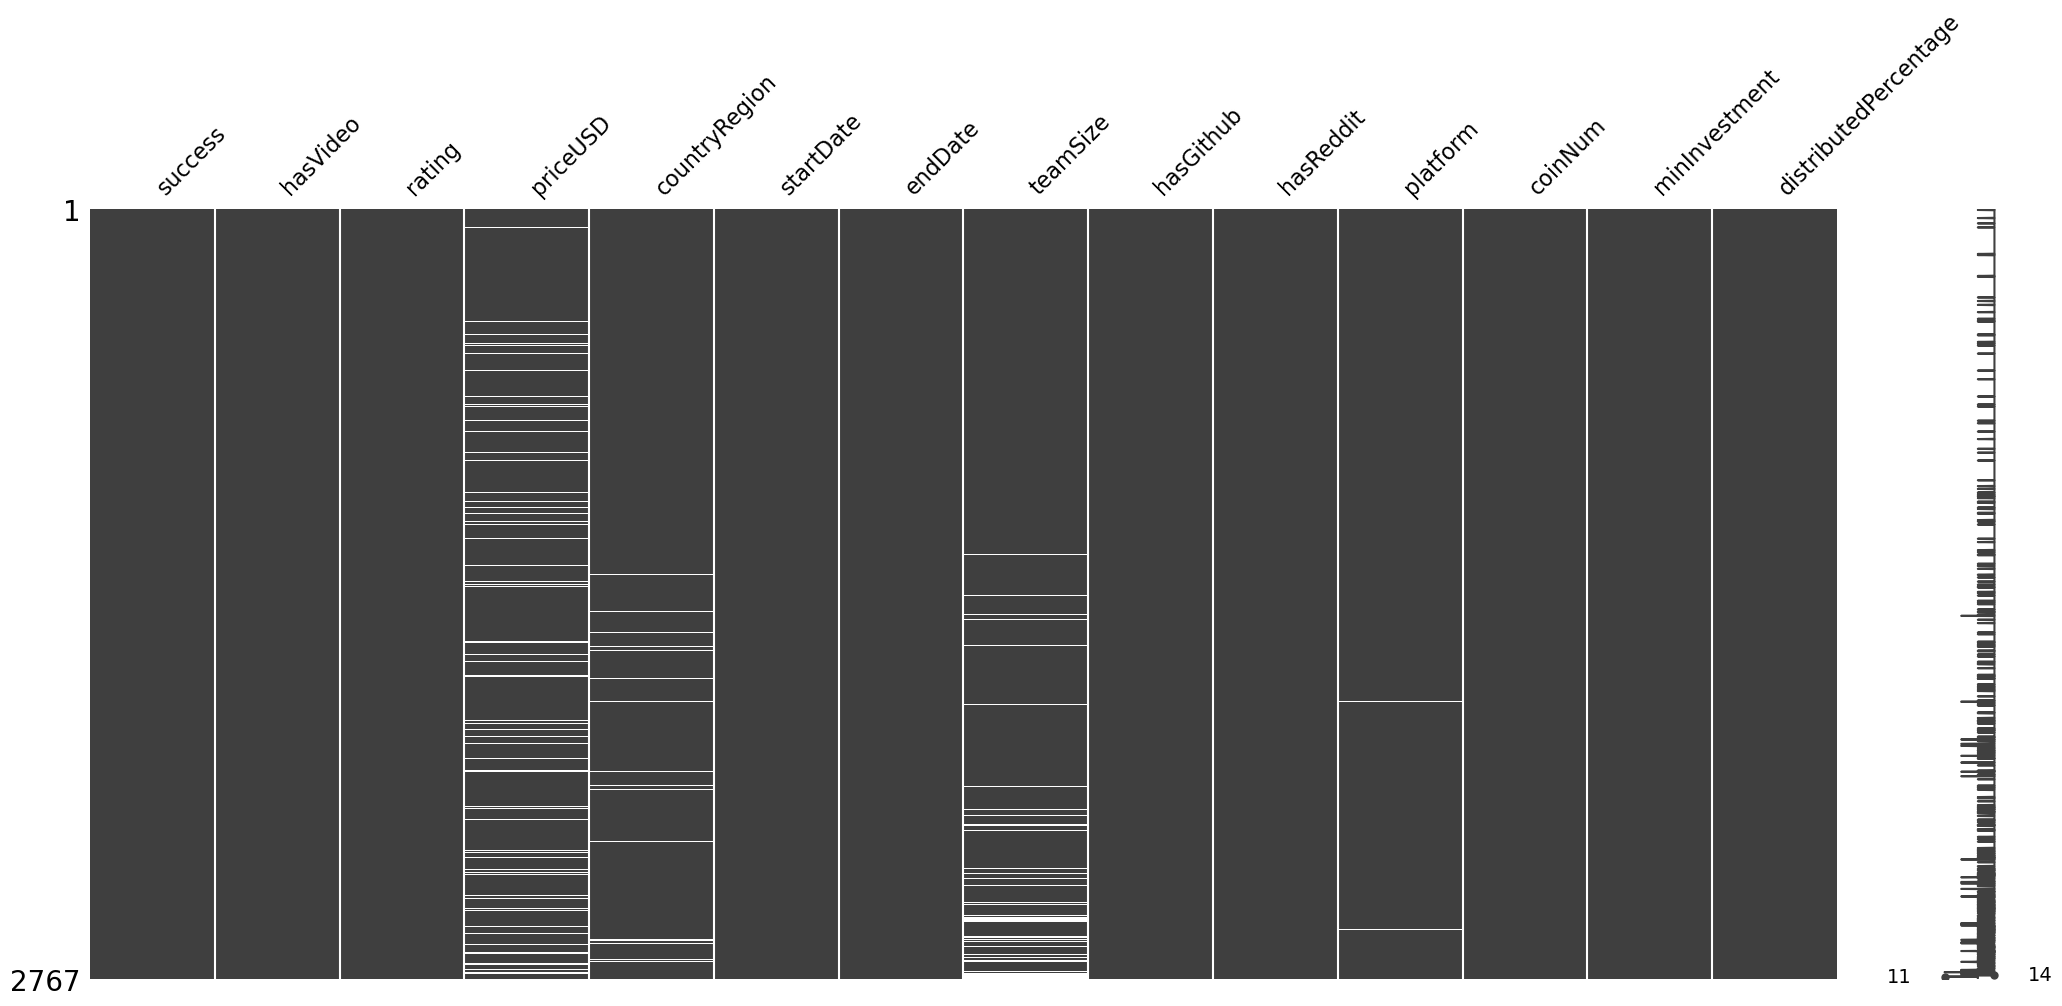

In [23]:
#Plot the matrox to see the combination of missing values
msno.matrix(ico_df)

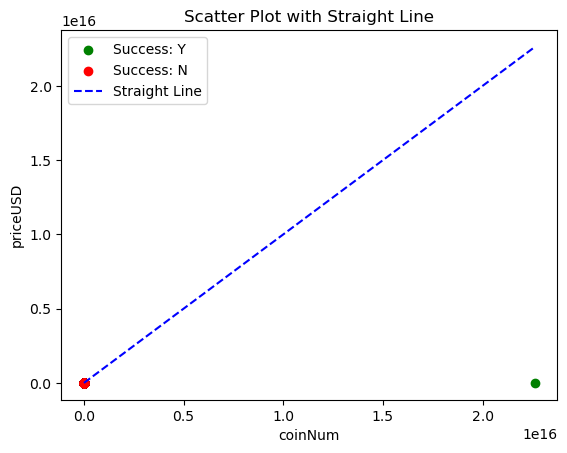

In [25]:
# Filter the DataFrame based on the 'success' column
success_Y_df = ico_df_clean[ico_df_clean['success'] == 'Y']
success_N_df = ico_df_clean[ico_df_clean['success'] == 'N']

# Plot the scatter points
plt.scatter(success_Y_df['coinNum'], success_Y_df['priceUSD'], color='green', label='Success: Y')
plt.scatter(success_N_df['coinNum'], success_N_df['priceUSD'], color='red', label='Success: N')

# Plot the straight line
x = np.linspace(ico_df_clean['coinNum'].min(), ico_df_clean['coinNum'].max(), 100)
y = x  # Straight line equation: y = x
plt.plot(x, y, color='blue', linestyle='--', label='Straight Line')

# Set labels and title
plt.xlabel('coinNum')
plt.ylabel('priceUSD')
plt.title('Scatter Plot with Straight Line')

# Show legend
plt.legend()

# Display the plot
plt.show()

Outlier detection

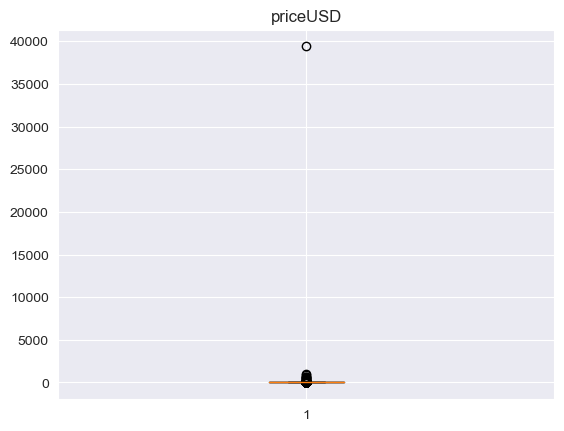

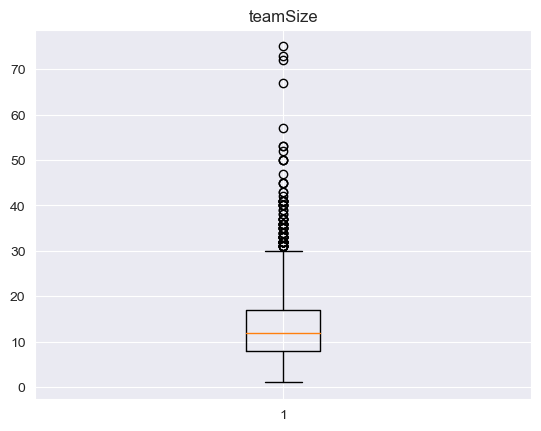

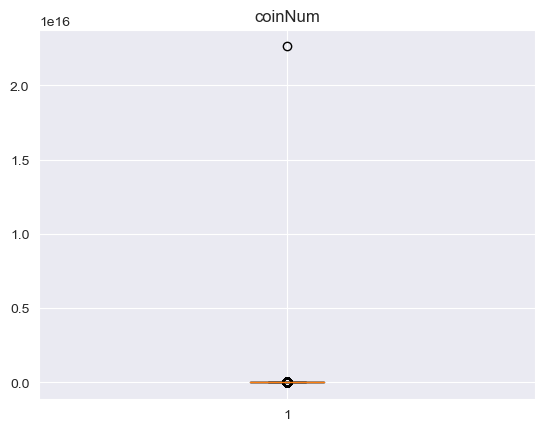

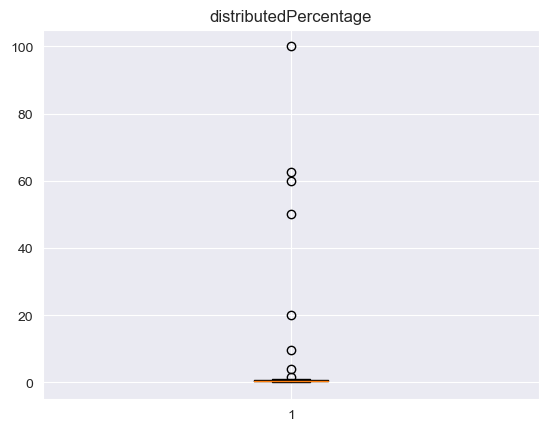

In [23]:
#Check for correlation among numerical values
#ico_df_clean[['priceUSD','teamSize','coinNum','distributedPercentage']].corr()

#CHECKING OUTLIERS
# Select the numerical columns in ico_df_clean
numerical_columns = ['priceUSD', 'teamSize', 'coinNum', 'distributedPercentage']

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure()
    plt.boxplot(ico_df_clean[column])
    plt.title(column)
    plt.show()

In [52]:
# from scipy import stats
#
# #ANOTHER METHOD TO CHECK OUTLIERS
# # Calculate the Z-scores for each numerical column
# z_scores = stats.zscore(ico_df_clean[numerical_columns])
#
# # Identify outliers using a threshold (e.g., Z-score > 3 or < -3)
# outliers = (z_scores > 3).any(axis=1)

# Print the rows with outliers
#ico_df_clean[outliers]

# Calculate the IQR (Interquartile Range)
Q1 = ico_df_clean['priceUSD'].quantile(0.25)
Q3 = ico_df_clean['priceUSD'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = ico_df_clean[(ico_df_clean['priceUSD'] < lower_bound) | (ico_df_clean['priceUSD'] > upper_bound)]
num_outliers = len(outliers)

# Print the result
print("Number of outliers in the column:", num_outliers)

Number of outliers in the column: 357


In [53]:
# Calculate the IQR (Interquartile Range)
Q1 = ico_df_clean['distributedPercentage'].quantile(0.25)
Q3 = ico_df_clean['distributedPercentage'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = ico_df_clean[(ico_df_clean['distributedPercentage'] < lower_bound) | (ico_df_clean['distributedPercentage'] > upper_bound)]
num_outliers = len(outliers)

# Print the result
print("Number of outliers in the column:", num_outliers)

Number of outliers in the column: 8


In [55]:
# Calculate the IQR (Interquartile Range)
Q1 = ico_df_clean['coinNum'].quantile(0.25)
Q3 = ico_df_clean['coinNum'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = ico_df_clean[(ico_df_clean['coinNum'] < lower_bound) | (ico_df_clean['coinNum'] > upper_bound)]
num_outliers = len(outliers)

# Print the result
print("Number of outliers in the column:", num_outliers)

Number of outliers in the column: 395


In [56]:
# Calculate the IQR (Interquartile Range)
Q1 = ico_df_clean['teamSize'].quantile(0.25)
Q3 = ico_df_clean['teamSize'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = ico_df_clean[(ico_df_clean['teamSize'] < lower_bound) | (ico_df_clean['teamSize'] > upper_bound)]
num_outliers = len(outliers)

# Print the result
print("Number of outliers in the column:", num_outliers)

Number of outliers in the column: 88


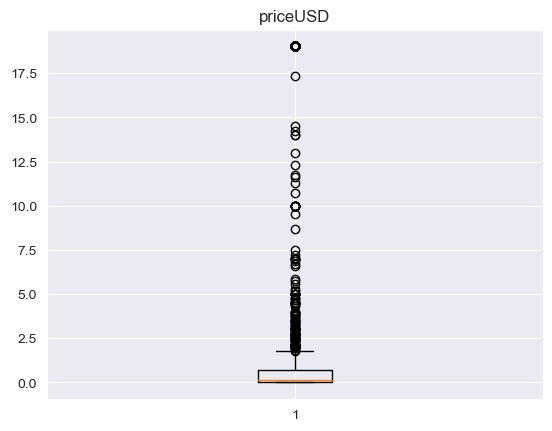

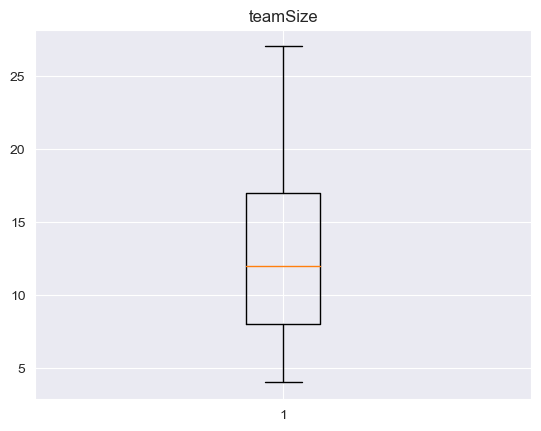

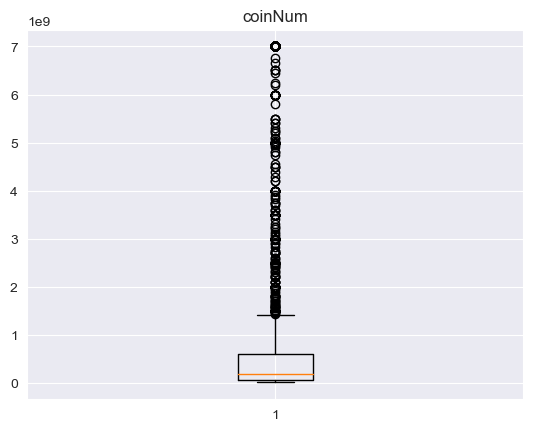

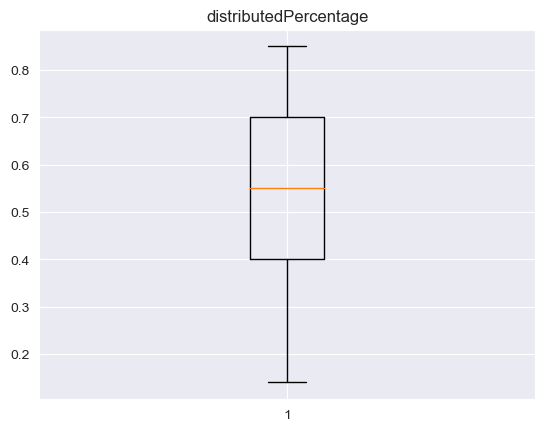

In [24]:
from scipy.stats.mstats import winsorize

ico_df_final = ico_df_clean.copy()
# Apply Winsorization to the numerical columns
for column in numerical_columns:
    ico_df_final[column] = winsorize(ico_df_final[column], limits=[0.05, 0.05])

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure()
    plt.boxplot(ico_df_final[column])
    plt.title(column)
    plt.show()

PERFORM NORMALIZATION USING ROBUST SCALING WITH OUTLIERS HANDLED

In [36]:
ico_df_normOut = ico_df_final.copy()

from sklearn.preprocessing import RobustScaler

# Create a MinMaxScaler object
scaler = RobustScaler()

# Fit and transform the numerical columns
ico_df_normOut[numerical_columns] = scaler.fit_transform(ico_df_normOut[numerical_columns])

PERFORM NORMALIZATION USING ROBUST SCALING WITHOUT OUTLIERS HANDLED

In [37]:
ico_df_norm = ico_df_clean.copy()

from sklearn.preprocessing import RobustScaler

# Create a MinMaxScaler object
scaler = RobustScaler()

# Fit and transform the numerical columns
ico_df_norm[numerical_columns] = scaler.fit_transform(ico_df_norm[numerical_columns])

IMPLEMENTING DECISION TREE WITH ADABOOST (N:0, 1:Y)

D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Split: 0.6, max_depth: 1, Accuracy: 0.6807228915662651, AUC: 0.6936768149882904, F1 Score (Class 0): 0.7633928571428573, F1 Score (Class 1): 0.5092592592592592
Split: 0.6, max_depth: 5, Accuracy: 0.5692771084337349, AUC: 0.5960187353629977, F1 Score (Class 0): 0.6666666666666666, F1 Score (Class 1): 0.39148936170212767
Split: 0.6, max_depth: 10, Accuracy: 0.6807228915662651, AUC: 0.6956674473067916, F1 Score (Class 0): 0.7705627705627706, F1 Score (Class 1): 0.4752475247524752
Split: 0.6, max_depth: 15, Accuracy: 0.677710843373494, AUC: 0.7020686963309913, F1 Score (Class 0): 0.7688984881209504, F1 Score (Class 1): 0.46766169154228854
Split: 0.6, max_depth: 20, Accuracy: 0.6656626506024096, AUC: 0.675663544106167, F1 Score (Class 0): 0.7592190889370933, F1 Score (Class 1): 0.45320197044334976
Split: 0.6, max_depth: 25, Accuracy: 0.6024096385542169, AUC: 0.5740827478532396, F1 Score (Class 0): 0.6842105263157895, F1 Score (Class 1): 0.46341463414634143
Split: 0.6, max_depth: 30, Accurac

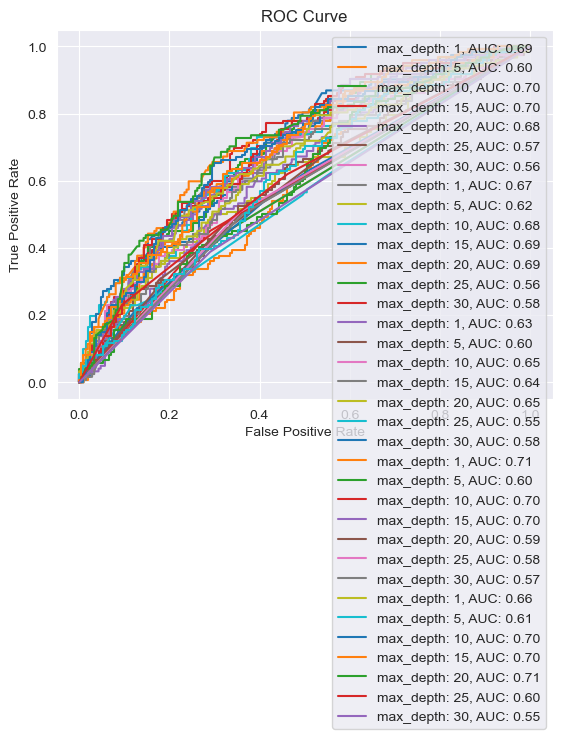

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Create separate encoders for 'countryRegion' and 'platform'
country_encoder = OneHotEncoder(sparse=False)
platform_encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_clean[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_clean[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_clean.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_clean, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform', 'startDate', 'endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success', axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Define the train/test split ratios
train_test_splits = [0.6]  # Example split ratios, adjust as needed

# Define the max_depth values to evaluate
max_depth_values = [1, 5, 10, 15, 20, 25, 30]  # Example max_depth values, adjust as needed

# # Iterate over train/test split ratios
# for split in train_test_splits:
#     # Split the dataset into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split, random_state=42)
#
#     # Perform k-fold cross-validation on the 'platform' column
#     kf = StratifiedKFold(n_splits=n_splits)
#     # Create arrays to store the evaluation metrics
#     f1_scores_0 = []
#     f1_scores_1 = []
#     auc_scores = []
#     accuracy_scores = []
#
#     for train_index, val_index in kf.split(X_train, y_train):
#         X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
#         y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
#
#         for max_depth in max_depth_values:
#             # Create the decision tree classifier with the specified max_depth
#             base_estimator = DecisionTreeClassifier(max_depth=max_depth)
#
#             # Create an AdaBoost classifier using the decision tree classifier as the base estimator
#             clf = AdaBoostClassifier(estimator=base_estimator)
#
#             # Train the classifier
#             clf.fit(X_train_fold, y_train_fold)
#
#             # Make predictions on the validation set
#             y_val_pred = clf.predict(X_val_fold)
#
#             # Calculate accuracy score
#             accuracy = accuracy_score(y_val_fold, y_val_pred)
#
#             # Calculate the probabilities for class 1 in the predicted labels
#             y_val_pred_proba = clf.predict_proba(X_val_fold)[:, 1]
#
#             # Calculate the ROC curve
#             fpr, tpr, thresholds = roc_curve(y_val_fold, y_val_pred_proba)
#
#             # Calculate AUC score
#             auc = roc_auc_score(y_val_fold, y_val_pred_proba)
#
#             # Calculate F1 scores for both classes
#             f1_0 = f1_score(y_val_fold, y_val_pred, average='binary', pos_label=0)
#             f1_1 = f1_score(y_val_fold, y_val_pred, average='binary', pos_label=1)
#
#             # Append the F1 scores and AUC score to the arrays
#             f1_scores_0.append(f1_0)
#             f1_scores_1.append(f1_1)
#             auc_scores.append(auc)
#             accuracy_scores.append(accuracy)
#
#             # Print the results
#             print(f"Split: {split}, max_depth: {max_depth}, Accuracy: {accuracy}, AUC: {auc}, F1 Score (Class 0): {f1_0}, F1 Score (Class 1): {f1_1}")
#
#             # Plot the ROC curve
#             plt.plot(fpr, tpr, label=f"max_depth: {max_depth}, AUC: {auc:.2f}")
#
#     avg_f1_0 = np.mean(f1_scores_0)
#     avg_f1_1 = np.mean(f1_scores_1)
#     avg_auc = np.mean(auc_scores)
#     avg_accuracy = np.mean(accuracy_scores)
#
#     # Print the average F1 scores, AUC score, and accuracy
#     print(f"Split: {split}, Average F1 Score (Class 0): {avg_f1_0}, Average F1 Score (Class 1): {avg_f1_1}, Average AUC: {avg_auc}, Average Accuracy: {avg_accuracy}")
#
#     # Show the plot for each split
#     plt.legend()
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.show()

D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoen

Best Parameters: {'base_estimator__max_depth': 10, 'n_estimators': 150}
Accuracy: 0.6446654611211573
AUC: 0.5868880991339329
F1 Score (Class 0): 0.7426326129666013
F1 Score (Class 1): 0.4262773722627738
Average Accuracy: 0.6446654611211573
Average AUC: 0.5868880991339329
Average F1 Score (Class 0): 0.7426326129666013
Average F1 Score (Class 1): 0.4262773722627738


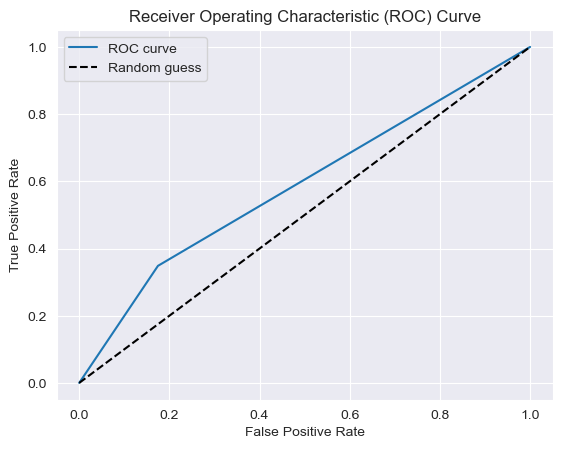

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the parameter grid for grid search or random search
param_grid = {
    'base_estimator__max_depth': [5, 10, 15, 20, 25, 30],  # Specify the range of max_depth values
    'n_estimators': [50, 100, 150, 200]  # Specify the range of the number of estimators
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Create an AdaBoost classifier
ada_boost = AdaBoostClassifier(estimator=dt_classifier)

# Perform grid search or random search
# Grid Search:
search = GridSearchCV(ada_boost, param_grid, scoring='accuracy', cv=5)

# Random Search:
#search = RandomizedSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Get the best estimator and its associated parameters
best_dt_classifier = search.best_estimator_
best_params = search.best_params_

print("Best Parameters:", best_params)

# Use the best classifier to make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1_class0 = f1_score(y_test, y_pred, pos_label=0)
f1_class1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score (Class 0):", f1_class0)
print("F1 Score (Class 1):", f1_class1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print average evaluation metrics
avg_accuracy = np.mean(accuracy)
avg_auc = np.mean(auc)
avg_f1_class0 = np.mean(f1_class0)
avg_f1_class1 = np.mean(f1_class1)

print("Average Accuracy:", avg_accuracy)
print("Average AUC:", avg_auc)
print("Average F1 Score (Class 0):", avg_f1_class0)
print("Average F1 Score (Class 1):", avg_f1_class1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

IMPLEMENTING DECISION TREE WITH ADABOOST (N:0, 1:Y) WITH OUTLIER HANDLED VALUES

D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoen

Best Parameters: {'base_estimator__max_depth': 10, 'n_estimators': 100}
Accuracy: 0.6464737793851718
AUC: 0.5925333416709223
F1 Score (Class 0): 0.7412309728656518
F1 Score (Class 1): 0.442225392296719
Average Accuracy: 0.6464737793851718
Average AUC: 0.5925333416709223
Average F1 Score (Class 0): 0.7412309728656518
Average F1 Score (Class 1): 0.442225392296719


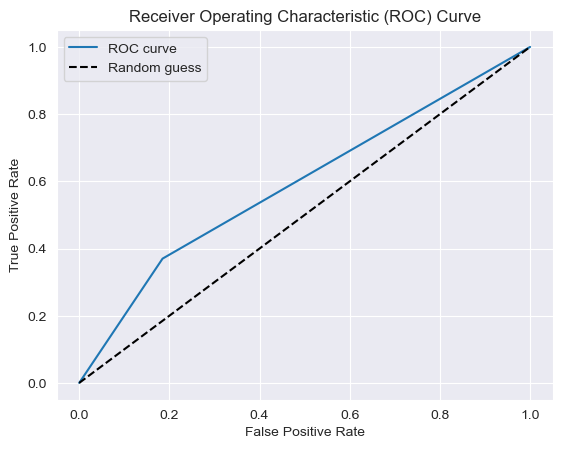

In [39]:
# Create separate encoders for 'countryRegion' and 'platform'
country_encoder = OneHotEncoder(sparse_output=False)
platform_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_final[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_final[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_final.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_final, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform','startDate','endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success',axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Define the train/test split ratios
train_test_splits = [0.6]  # Example split ratios, adjust as needed

# Define the max_depth values to evaluate
max_depth_values = [1, 5, 10, 15, 20, 25, 30] # Example max_depth values, adjust as needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the parameter grid for grid search or random search
param_grid = {
    'base_estimator__max_depth': [5, 10, 15, 20, 25, 30],  # Specify the range of max_depth values
    'n_estimators': [50, 100, 150, 200]  # Specify the range of the number of estimators
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Create an AdaBoost classifier
ada_boost = AdaBoostClassifier(estimator=dt_classifier)

# Perform grid search or random search
# Grid Search:
search = GridSearchCV(ada_boost, param_grid, scoring='accuracy', cv=5)

# Random Search:
#search = RandomizedSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Get the best estimator and its associated parameters
best_dt_classifier = search.best_estimator_
best_params = search.best_params_

print("Best Parameters:", best_params)

# Use the best classifier to make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1_class0 = f1_score(y_test, y_pred, pos_label=0)
f1_class1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score (Class 0):", f1_class0)
print("F1 Score (Class 1):", f1_class1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print average evaluation metrics
avg_accuracy = np.mean(accuracy)
avg_auc = np.mean(auc)
avg_f1_class0 = np.mean(f1_class0)
avg_f1_class1 = np.mean(f1_class1)

print("Average Accuracy:", avg_accuracy)
print("Average AUC:", avg_auc)
print("Average F1 Score (Class 0):", avg_f1_class0)
print("Average F1 Score (Class 1):", avg_f1_class1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

IMPLEMENTING DECISION TREE WITH ADABOOST (N:0, 1:Y) WITH JUST NORMALIZED

D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoen

Best Parameters: {'base_estimator__max_depth': 15, 'n_estimators': 50}
Accuracy: 0.6320072332730561
AUC: 0.5771643859886817
F1 Score (Class 0): 0.7306419589675712
F1 Score (Class 1): 0.41940085592011417
Average Accuracy: 0.6320072332730561
Average AUC: 0.5771643859886817
Average F1 Score (Class 0): 0.7306419589675712
Average F1 Score (Class 1): 0.41940085592011417


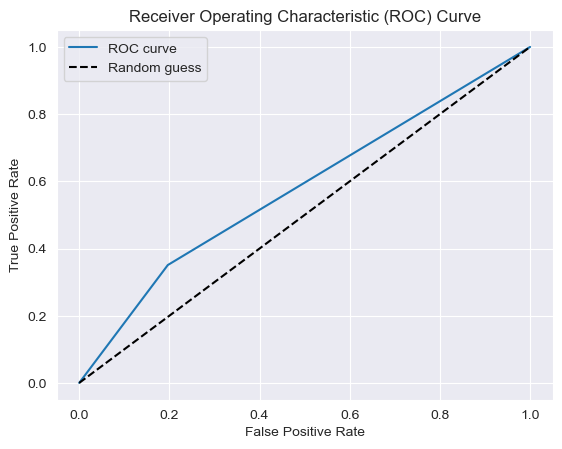

In [38]:
# Create separate encoders for 'countryRegion' and 'platform'
country_encoder = OneHotEncoder(sparse_output=False)
platform_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_norm[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_norm[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_norm.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_norm, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform','startDate','endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success',axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Define the train/test split ratios
train_test_splits = [0.6]  # Example split ratios, adjust as needed

# Define the max_depth values to evaluate
max_depth_values = [1, 5, 10, 15, 20, 25, 30] # Example max_depth values, adjust as needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the parameter grid for grid search or random search
param_grid = {
    'base_estimator__max_depth': [5, 10, 15, 20, 25, 30],  # Specify the range of max_depth values
    'n_estimators': [50, 100, 150, 200]  # Specify the range of the number of estimators
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Create an AdaBoost classifier
ada_boost = AdaBoostClassifier(estimator=dt_classifier)

# Perform grid search or random search
# Grid Search:
search = GridSearchCV(ada_boost, param_grid, scoring='accuracy', cv=5)

# Random Search:
#search = RandomizedSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Get the best estimator and its associated parameters
best_dt_classifier = search.best_estimator_
best_params = search.best_params_

print("Best Parameters:", best_params)

# Use the best classifier to make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1_class0 = f1_score(y_test, y_pred, pos_label=0)
f1_class1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score (Class 0):", f1_class0)
print("F1 Score (Class 1):", f1_class1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print average evaluation metrics
avg_accuracy = np.mean(accuracy)
avg_auc = np.mean(auc)
avg_f1_class0 = np.mean(f1_class0)
avg_f1_class1 = np.mean(f1_class1)

print("Average Accuracy:", avg_accuracy)
print("Average AUC:", avg_auc)
print("Average F1 Score (Class 0):", avg_f1_class0)
print("Average F1 Score (Class 1):", avg_f1_class1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

IMPLEMENTING DECISION TREE WITH ADABOOST (N:0, 1:Y) WITH OUTLIER HANDLED + NORMALIZED

D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
D:\University_Projects\ml_in_practice\icoen

Best Parameters: {'base_estimator__max_depth': 10, 'n_estimators': 200}
Accuracy: 0.6428571428571429
AUC: 0.5854324950582415
F1 Score (Class 0): 0.740983606557377
F1 Score (Class 1): 0.4250363901018923
Average Accuracy: 0.6428571428571429
Average AUC: 0.5854324950582415
Average F1 Score (Class 0): 0.740983606557377
Average F1 Score (Class 1): 0.4250363901018923


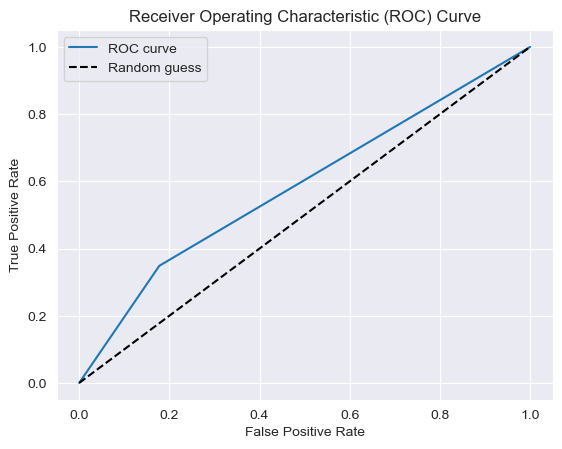

In [40]:
# Create separate encoders for 'countryRegion' and 'platform'
country_encoder = OneHotEncoder(sparse_output=False)
platform_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_normOut[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_normOut[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_normOut.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_normOut, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform','startDate','endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success',axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Define the train/test split ratios
train_test_splits = [0.6]  # Example split ratios, adjust as needed

# Define the max_depth values to evaluate
max_depth_values = [1, 5, 10, 15, 20, 25, 30] # Example max_depth values, adjust as needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the parameter grid for grid search or random search
param_grid = {
    'base_estimator__max_depth': [5, 10, 15, 20, 25, 30],  # Specify the range of max_depth values
    'n_estimators': [50, 100, 150, 200]  # Specify the range of the number of estimators
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Create an AdaBoost classifier
ada_boost = AdaBoostClassifier(estimator=dt_classifier)

# Perform grid search or random search
# Grid Search:
search = GridSearchCV(ada_boost, param_grid, scoring='accuracy', cv=5)

# Random Search:
#search = RandomizedSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Get the best estimator and its associated parameters
best_dt_classifier = search.best_estimator_
best_params = search.best_params_

print("Best Parameters:", best_params)

# Use the best classifier to make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1_class0 = f1_score(y_test, y_pred, pos_label=0)
f1_class1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score (Class 0):", f1_class0)
print("F1 Score (Class 1):", f1_class1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print average evaluation metrics
avg_accuracy = np.mean(accuracy)
avg_auc = np.mean(auc)
avg_f1_class0 = np.mean(f1_class0)
avg_f1_class1 = np.mean(f1_class1)

print("Average Accuracy:", avg_accuracy)
print("Average AUC:", avg_auc)
print("Average F1 Score (Class 0):", avg_f1_class0)
print("Average F1 Score (Class 1):", avg_f1_class1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

BEST METHOD - IMPLEMENTING DECISION TREE WITH ADABOOST (N:0, 1:Y) WITH OUTLIER HANDLED VALUES.
NOW APPLYING K-FOLD TO THIS.

D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estima

Best Parameters: {'base_estimator__max_depth': 10, 'n_estimators': 200}


D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estima

Accuracy Scores: [0.63963964 0.7239819  0.67420814 0.66515837 0.65158371]
AUC Scores: [0.67055749 0.70308642 0.70758377 0.68130511 0.64303351]
F1 Scores: [0.44444444 0.55223881 0.56115108 0.48611111 0.34146341]
Average Accuracy: 0.6709143532672944
Average AUC: 0.6811132619262701
Average F1 Score: 0.4770817710593083
Accuracy: 0.6491862567811935
AUC: 0.5932770451494076
F1 Score (Class 0): 0.7442882249560633
F1 Score (Class 1): 0.4414587332053743


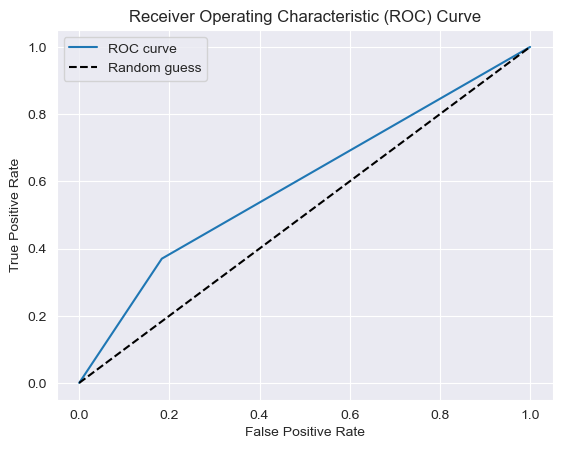

In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create separate encoders for 'countryRegion' and 'platform'
country_encoder = OneHotEncoder(sparse_output=False)
platform_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_final[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_final[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_final.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_final, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform','startDate','endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success',axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Define the train/test split ratios
train_test_splits = [0.6]  # Example split ratios, adjust as needed

# Define the max_depth values to evaluate
max_depth_values = [1, 5, 10, 15, 20, 25, 30] # Example max_depth values, adjust as needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Define the parameter grid for grid search or random search
param_grid = {
    'base_estimator__max_depth': [5, 10, 15, 20, 25, 30],  # Specify the range of max_depth values
    'n_estimators': [50, 100, 150, 200]  # Specify the range of the number of estimators
}

# Create a decision tree classifier as the base estimator
dt_classifier = DecisionTreeClassifier()

# Create an AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=dt_classifier)

# Perform grid search or random search
#Grid Search:
search = GridSearchCV(ada_boost, param_grid, scoring='accuracy', cv=5)

# Random Search:
#search = RandomizedSearchCV(ada_boost, param_grid, scoring='accuracy', cv=5)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Get the best estimator and its associated parameters
best_ada_boost = search.best_estimator_
best_params = search.best_params_

print("Best Parameters:", best_params)

# Use k-fold cross-validation to evaluate the model's performance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(best_ada_boost, X_train, y_train, cv=cv, scoring='accuracy')
auc_scores = cross_val_score(best_ada_boost, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores = cross_val_score(best_ada_boost, X_train, y_train, cv=cv, scoring='f1')

# Print the evaluation scores for each fold
print("Accuracy Scores:", accuracy_scores)
print("AUC Scores:", auc_scores)
print("F1 Scores:", f1_scores)

# Calculate the average evaluation scores across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_auc = np.mean(auc_scores)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average AUC:", avg_auc)
print("Average F1 Score:", avg_f1)

# Use the best classifier to make predictions on the test set
y_pred = best_ada_boost.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1_class0 = f1_score(y_test, y_pred, pos_label=0)
f1_class1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score (Class 0):", f1_class0)
print("F1 Score (Class 1):", f1_class1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

IMPLEMENTING DECISION TREE WITH RANDOM FOREST

Best Parameters: {'max_depth': 15, 'n_estimators': 150}
Accuracy Scores: [0.64864865 0.72850679 0.68778281 0.64253394 0.64705882]
AUC Scores: [0.68632404 0.73747795 0.72037037 0.6686067  0.68236332]
F1 Scores: [0.39393939 0.55639098 0.4962406  0.44755245 0.384     ]
Average Accuracy: 0.670906200317965
Average AUC: 0.6990284767927044
Average F1 Score: 0.455624684087842
Accuracy: 0.6528028933092225
AUC: 0.5871624491871494
F1 Score (Class 0): 0.7536355859709153
F1 Score (Class 1): 0.4122448979591837


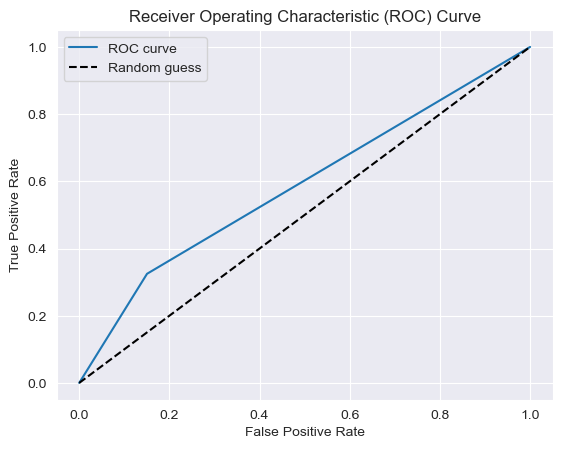

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc

# Create separate encoders for 'countryRegion' and 'platform'
country_encoder = OneHotEncoder(sparse_output=False)
platform_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_final[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_final[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_final.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_final, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform','startDate','endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success',axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# # Define the train/test split ratios
# train_test_splits = [0.6]  # Example split ratios, adjust as needed
#
# # Define the max_depth values to evaluate
# max_depth_values = [1, 5, 10, 15, 20, 25, 30] # Example max_depth values, adjust as needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],  # Specify the range of max_depth values
    'n_estimators': [50, 100, 150, 200]  # Specify the range of the number of estimators
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search
search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the search object to the training data
search.fit(X_train, y_train)

# Get the best estimator and its associated parameters
best_rf = search.best_estimator_
best_params = search.best_params_

print("Best Parameters:", best_params)

# Use k-fold cross-validation to evaluate the model's performance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(best_rf, X_train, y_train, cv=cv, scoring='accuracy')
auc_scores = cross_val_score(best_rf, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores = cross_val_score(best_rf, X_train, y_train, cv=cv, scoring='f1')

# Print the evaluation scores for each fold
print("Accuracy Scores:", accuracy_scores)
print("AUC Scores:", auc_scores)
print("F1 Scores:", f1_scores)

# Calculate the average evaluation scores across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_auc = np.mean(auc_scores)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average AUC:", avg_auc)
print("Average F1 Score:", avg_f1)

# Use the best classifier to make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1_class0 = f1_score(y_test, y_pred, pos_label=0)
f1_class1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score (Class 0):", f1_class0)
print("F1 Score (Class 1):", f1_class1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

Split with K-Fold and then do Random forest

Split: 0.6, max_depth: 1, Accuracy: 0.6325301204819277, AUC: 0.7117486338797814, F1 Score: 0.0
Split: 0.6, max_depth: 5, Accuracy: 0.6385542168674698, AUC: 0.7083528493364559, F1 Score: 0.14285714285714285
Split: 0.6, max_depth: 10, Accuracy: 0.6656626506024096, AUC: 0.7069867291178766, F1 Score: 0.33532934131736525
Split: 0.6, max_depth: 15, Accuracy: 0.6596385542168675, AUC: 0.6956284153005465, F1 Score: 0.3891891891891892
Split: 0.6, max_depth: 20, Accuracy: 0.6385542168674698, AUC: 0.6835284933645589, F1 Score: 0.34065934065934067
Split: 0.6, max_depth: 25, Accuracy: 0.6475903614457831, AUC: 0.6752927400468384, F1 Score: 0.4
Split: 0.6, max_depth: 30, Accuracy: 0.6445783132530121, AUC: 0.67256049960968, F1 Score: 0.3917525773195876
Split: 0.6, max_depth: 1, Accuracy: 0.6325301204819277, AUC: 0.6804839968774394, F1 Score: 0.0
Split: 0.6, max_depth: 5, Accuracy: 0.6475903614457831, AUC: 0.6829430132708821, F1 Score: 0.10687022900763359
Split: 0.6, max_depth: 10, Accuracy: 0.656626506

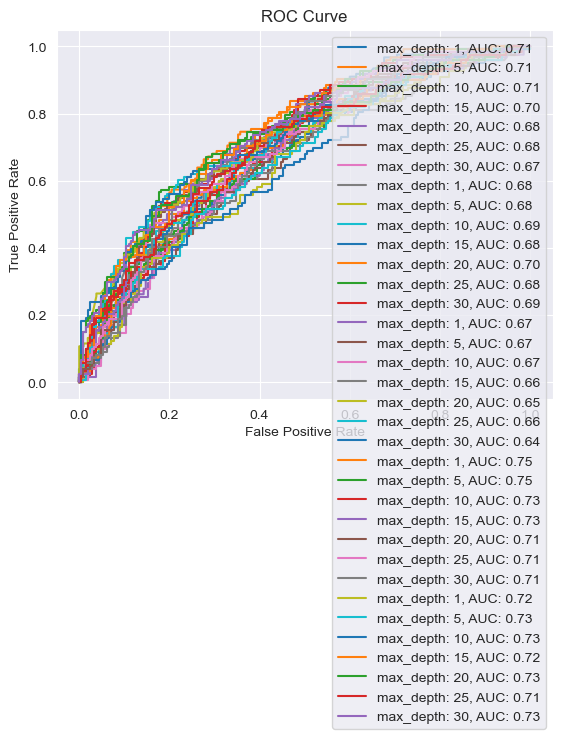

Split: 0.7, max_depth: 1, Accuracy: 0.627906976744186, AUC: 0.6609796524919983, F1 Score: 0.0
Split: 0.7, max_depth: 5, Accuracy: 0.6227390180878553, AUC: 0.6640089163237312, F1 Score: 0.08750000000000001
Split: 0.7, max_depth: 10, Accuracy: 0.6434108527131783, AUC: 0.6757544581618655, F1 Score: 0.36111111111111105
Split: 0.7, max_depth: 15, Accuracy: 0.6511627906976745, AUC: 0.6666095107453132, F1 Score: 0.41048034934497823
Split: 0.7, max_depth: 20, Accuracy: 0.6563307493540051, AUC: 0.6717535436671238, F1 Score: 0.44813278008298757
Split: 0.7, max_depth: 25, Accuracy: 0.6356589147286822, AUC: 0.6698102423411065, F1 Score: 0.41004184100418417
Split: 0.7, max_depth: 30, Accuracy: 0.6382428940568475, AUC: 0.6491197988111569, F1 Score: 0.4308943089430895
Split: 0.7, max_depth: 1, Accuracy: 0.627906976744186, AUC: 0.680927069044353, F1 Score: 0.0
Split: 0.7, max_depth: 5, Accuracy: 0.6356589147286822, AUC: 0.6952732053040694, F1 Score: 0.12422360248447205
Split: 0.7, max_depth: 10, Accur

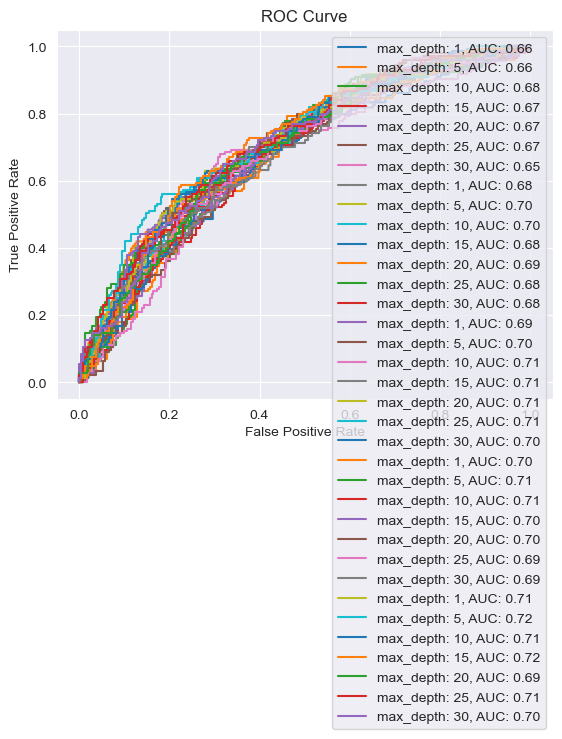

In [51]:
# Define the train/test split ratios
train_test_splits = [0.6, 0.7]  # Example split ratios, adjust as needed

# Define the max_depth values to evaluate
max_depth_values = [1, 5, 10, 15, 20, 25, 30] # Example max_depth values, adjust as needed

# Iterate over train/test split ratios
for split in train_test_splits:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split, random_state=42)

    # Perform k-fold cross-validation on the 'platform' column
    kf = StratifiedKFold(n_splits=n_splits)
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Iterate over max_depth values
        for max_depth in max_depth_values:
            # Create the random forest classifier with the specified max_depth
            clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth)

            # Train the classifier
            clf.fit(X_train_fold, y_train_fold)

            # Make predictions on the validation set
            y_val_pred = clf.predict(X_val_fold)

            # Calculate accuracy score
            accuracy = accuracy_score(y_val_fold, y_val_pred)

            # Calculate the probabilities for class 1 in the predicted labels
            y_val_pred_proba = clf.predict_proba(X_val_fold)[:, 1]

            # Calculate the ROC curve
            fpr, tpr, thresholds = roc_curve(y_val_fold, y_val_pred_proba)

            # Calculate AUC score
            auc = roc_auc_score(y_val_fold, y_val_pred_proba)

            # Calculate F1 score
            f1 = f1_score(y_val_fold, y_val_pred)

            # Print the results
            print(f"Split: {split}, max_depth: {max_depth}, Accuracy: {accuracy}, AUC: {auc}, F1 Score: {f1}")

            # Plot the ROC curve
            plt.plot(fpr, tpr, label=f"max_depth: {max_depth}, AUC: {auc:.2f}")

    # Show the plot for each split
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

NORMALIZATION FOR SVM

PERFORM SVM

Best Parameters: {'C': 1, 'gamma': 0.1}
Accuracy Scores: [0.63963964 0.67873303 0.64253394 0.61085973 0.64705882]
AUC Scores: [0.61585366 0.62292769 0.6143739  0.53849206 0.62813051]
F1 Scores: [0.31034483 0.39316239 0.30088496 0.2037037  0.27777778]
Average Accuracy: 0.6437650320003261
Average AUC: 0.6039555641588162
Average F1 Score: 0.29717473159645874
Accuracy: 0.6341169379144063
AUC: 0.5519484848390889
F1 Score (Class 0): 0.7505137690094533
F1 Score (Class 1): 0.3141242937853107


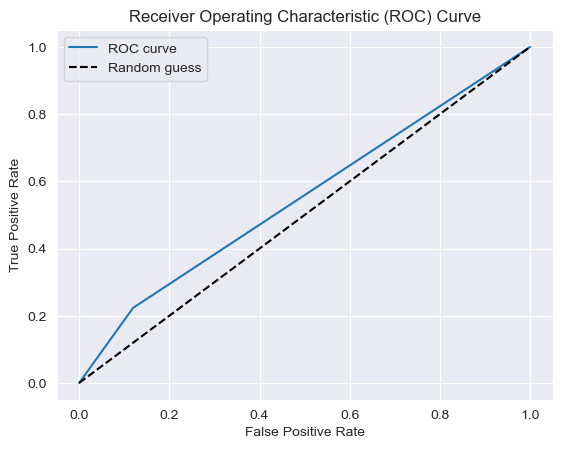

In [61]:
from sklearn.svm import SVC

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_normOut[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_normOut[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_normOut.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_normOut, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform','startDate','endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success',axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Define the parameter grid for grid search or random search
param_grid = {
    'C': [0.1, 1, 10],  # Specify the range of C values
    'gamma': [0.1, 1, 10]  # Specify the range of gamma values
}

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search
search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Get the best estimator and its associated parameters
best_svm = search.best_estimator_
best_params = search.best_params_

print("Best Parameters:", best_params)

# Use k-fold cross-validation to evaluate the model's performance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(best_svm, X_train, y_train, cv=cv, scoring='accuracy')
auc_scores = cross_val_score(best_svm, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores = cross_val_score(best_svm, X_train, y_train, cv=cv, scoring='f1')

# Print the evaluation scores for each fold
print("Accuracy Scores:", accuracy_scores)
print("AUC Scores:", auc_scores)
print("F1 Scores:", f1_scores)

# Calculate the average evaluation scores across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_auc = np.mean(auc_scores)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average AUC:", avg_auc)
print("Average F1 Score:", avg_f1)

# Use the best classifier to make predictions on the test set
y_pred = best_svm.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1_class0 = f1_score(y_test, y_pred, pos_label=0)
f1_class1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score (Class 0):", f1_class0)
print("F1 Score (Class 1):", f1_class1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

SVM without changing outlier and using Robust Scaling

Split: 0.6, Accuracy: 0.5481927710843374, AUC: 0.5452380952380952, F1 Score: 0.4525547445255475
Split: 0.6, Accuracy: 0.5150602409638554, AUC: 0.5441061670569867, F1 Score: 0.4615384615384616
Split: 0.6, Accuracy: 0.49698795180722893, AUC: 0.5414129586260734, F1 Score: 0.4377104377104377
Split: 0.6, Accuracy: 0.5090361445783133, AUC: 0.5613973458235753, F1 Score: 0.46204620462046203
Split: 0.6, Accuracy: 0.5830815709969789, AUC: 0.6259346713892169, F1 Score: 0.54
Split: 0.6, Average F1 Score: 0.4707699696789819, Average AUC: 0.5636178476267896


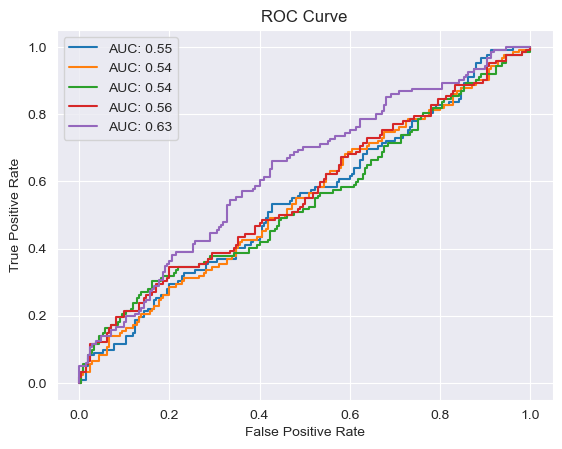

Split: 0.7, Accuracy: 0.48578811369509045, AUC: 0.5118312757201646, F1 Score: 0.4265129682997118
Split: 0.7, Accuracy: 0.40310077519379844, AUC: 0.5590134887974394, F1 Score: 0.5497076023391814
Split: 0.7, Accuracy: 0.3875968992248062, AUC: 0.5277714089189499, F1 Score: 0.5362035225048923
Split: 0.7, Accuracy: 0.3772609819121447, AUC: 0.5620199472658489, F1 Score: 0.5208747514910537
Split: 0.7, Accuracy: 0.3798449612403101, AUC: 0.5968416829072567, F1 Score: 0.5419847328244276
Split: 0.7, Average F1 Score: 0.5150567154918533, Average AUC: 0.5514955607219318


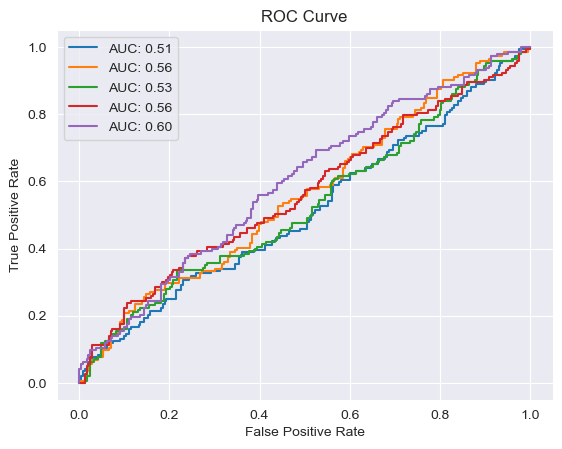

In [92]:
from sklearn.svm import SVC

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_norm[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_norm[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_norm.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_norm, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform','brandSlogan','startDate','endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success',axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Define the train/test split ratios
train_test_splits = [0.6, 0.7]  # Example split ratios, adjust as needed

# Iterate over train/test split ratios
for split in train_test_splits:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split, random_state=42)

    # Perform k-fold cross-validation on the 'platform' column
    kf = StratifiedKFold(n_splits=n_splits)
    # Create arrays to store the evaluation metrics
    f1_scores = []
    auc_scores = []

    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create the SVM classifier
        svm_classifier = SVC(probability=True, class_weight="balanced")

        # Train the classifier
        svm_classifier.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation set
        y_val_pred = svm_classifier.predict(X_val_fold)


        # Calculate accuracy score
        accuracy = accuracy_score(y_val_fold, y_val_pred)

        # Calculate the probabilities for class 1 in the predicted labels
        # y_val_pred_proba = svm_classifier.predict_proba(X_val_fold)[:, 1]
        # Calculate the decision function scores for class 1
        y_val_pred_proba = svm_classifier.decision_function(X_val_fold)

        # Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_val_fold, y_val_pred_proba)

        # Calculate AUC score
        auc = roc_auc_score(y_val_fold, y_val_pred_proba)

        # Calculate F1 score
        f1 = f1_score(y_val_fold, y_val_pred)

        # Append the F1 score and AUC score to the arrays
        f1_scores.append(f1)
        auc_scores.append(auc)

        # Print the results
        print(f"Split: {split}, Accuracy: {accuracy}, AUC: {auc}, F1 Score: {f1}")

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f"AUC: {auc:.2f}")

    avg_f1 = sum(f1_scores) / len(f1_scores)
    avg_auc = sum(auc_scores) / len(auc_scores)

    # Print the average F1 score and AUC score
    print(f"Split: {split}, Average F1 Score: {avg_f1}, Average AUC: {avg_auc}")

    # Show the plot for each split
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

IMPLEMENTING ANN WITH ROBUST SCALING AND NOT HANDLING OUTLIERS

D:\University_Projects\ml_in_practice\icoenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}
Accuracy Scores: [0.62162162 0.66063348 0.64705882 0.59276018 0.60180995]
AUC Scores: [0.64355401 0.65582011 0.69294533 0.67178131 0.65564374]
F1 Scores: [0.43589744 0.5170068  0.52071006 0.40268456 0.45714286]
Average Accuracy: 0.6247768130121072
Average AUC: 0.6639488966318235
Average F1 Score: 0.46668834373827367
Accuracy: 0.6021699819168174
AUC: 0.5830129268512001
F1 Score (Class 0): 0.6745562130177515
F1 Score (Class 1): 0.48837209302325585


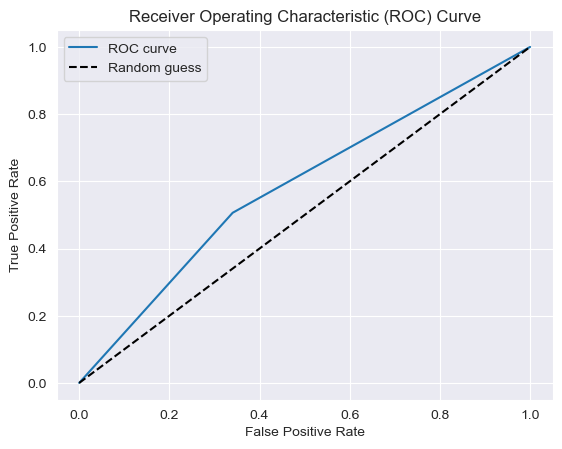

In [63]:
from sklearn.neural_network import MLPClassifier

# Fit and transform the 'countryRegion' column
country_encoded = country_encoder.fit_transform(ico_df_normOut[['countryRegion']])

# Fit and transform the 'platform' column
platform_encoded = platform_encoder.fit_transform(ico_df_normOut[['platform']])

# Convert the encoded arrays into a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoder.categories_[0])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_encoder.categories_[0])

# Reset the index of the encoded columns and original dataframe
country_encoded_df.reset_index(drop=True, inplace=True)
platform_encoded_df.reset_index(drop=True, inplace=True)
ico_df_normOut.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrames with the original DataFrame
ico_df_encoded = pd.concat([ico_df_normOut, country_encoded_df, platform_encoded_df], axis=1)

# Remove the original 'countryRegion' and 'platform' columns
ico_df_encoded.drop(['countryRegion', 'platform','startDate','endDate'], axis=1, inplace=True)

# Create the feature matrix (X) and the target variable (y)
X = ico_df_encoded.drop('success',axis=1)
y = ico_df_encoded['success']

# Encode the target variable 'success'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Define the train/test split ratios
# train_test_splits = [0.6, 0.7]  # Example split ratios, adjust as needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Define the parameter grid for grid search or random search
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],  # Specify different hidden layer configurations
    'activation': ['relu', 'tanh'],  # Specify different activation functions
    'alpha': [0.0001, 0.001, 0.01]  # Specify different regularization strengths
}

# Create an ANN classifier
ann_classifier = MLPClassifier(max_iter=10000)

# Perform grid search
search = GridSearchCV(ann_classifier, param_grid, cv=5)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Get the best estimator and its associated parameters
best_ann = search.best_estimator_
best_params = search.best_params_

print("Best Parameters:", best_params)

# Use k-fold cross-validation to evaluate the model's performance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(best_ann, X_train, y_train, cv=cv, scoring='accuracy')
auc_scores = cross_val_score(best_ann, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores = cross_val_score(best_ann, X_train, y_train, cv=cv, scoring='f1')

# Print the evaluation scores for each fold
print("Accuracy Scores:", accuracy_scores)
print("AUC Scores:", auc_scores)
print("F1 Scores:", f1_scores)

# Calculate the average evaluation scores across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_auc = np.mean(auc_scores)
avg_f1 = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average AUC:", avg_auc)
print("Average F1 Score:", avg_f1)

# Use the best classifier to make predictions on the test set
y_pred = best_ann.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1_class0 = f1_score(y_test, y_pred, pos_label=0)
f1_class1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score (Class 0):", f1_class0)
print("F1 Score (Class 1):", f1_class1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()